This demonstrates how to plot a three-combo plot with `Petrolib` modules. The first step is to load the well data (either in .las, .csv or .txt). For simplicity, you can decide to selectively load the the composite logs

In [3]:
from petrolib.file_reader import load_las

well_df, las_obj = load_las('WELL_A - Copy.LAS', return_csv=True, curves=['GR', 'RT', 'RHOB', 'NPHI_NUERALNET'])

#reset index
well_df = well_df.reset_index()

#preview first few lines 
well_df.head()

,DEPT,GR,RT,RHOB,NPHI_NUERALNET
0,5000.0,NaN,NaN,NaN,NaN
1,5000.5,NaN,NaN,NaN,NaN
2,5001.0,NaN,NaN,NaN,NaN
3,5001.5,NaN,NaN,NaN,NaN
4,5002.0,NaN,NaN,NaN,NaN


Next off, we rename the log curves to maintain conventional names

In [8]:
from petrolib.procs import set_alias

well_df = set_alias(well_df, DEPTH='DEPT', GR='GR', RT='RT', NPHI='NPHI_NUERALNET', RHOB='RHOB')

well_df.head()

,DEPTH,GR,RT,RHOB,NPHI
0,5000.0,NaN,NaN,NaN,NaN
1,5000.5,NaN,NaN,NaN,NaN
2,5001.0,NaN,NaN,NaN,NaN
3,5001.5,NaN,NaN,NaN,NaN
4,5002.0,NaN,NaN,NaN,NaN


Then you may decide to clean the data to ensure that it follows conventional values 

In [16]:
from petrolib.procs import process_data

well_df = process_data(well_df, 'GR', 'RT', 'NPHI', 'RHOB')
well_df.describe()

,DEPTH,GR,RT,RHOB,NPHI
count,10041.00000,8637.000000,9806.000000,9778.000000,8637.000000
mean,7510.00000,62.190853,87.168153,2.259300,0.307351
std,1449.36568,27.879147,333.953441,0.141427,0.119166
min,5000.00000,4.790300,0.790300,1.950000,-0.150000
25%,6255.00000,38.343800,2.274725,2.156425,0.239921
50%,7510.00000,59.883099,6.123750,2.241600,0.314726
75%,8765.00000,87.391701,17.965950,2.364800,0.406013
max,10020.00000,150.000000,2000.000000,2.674300,0.450000


Then we plot the three combo plot

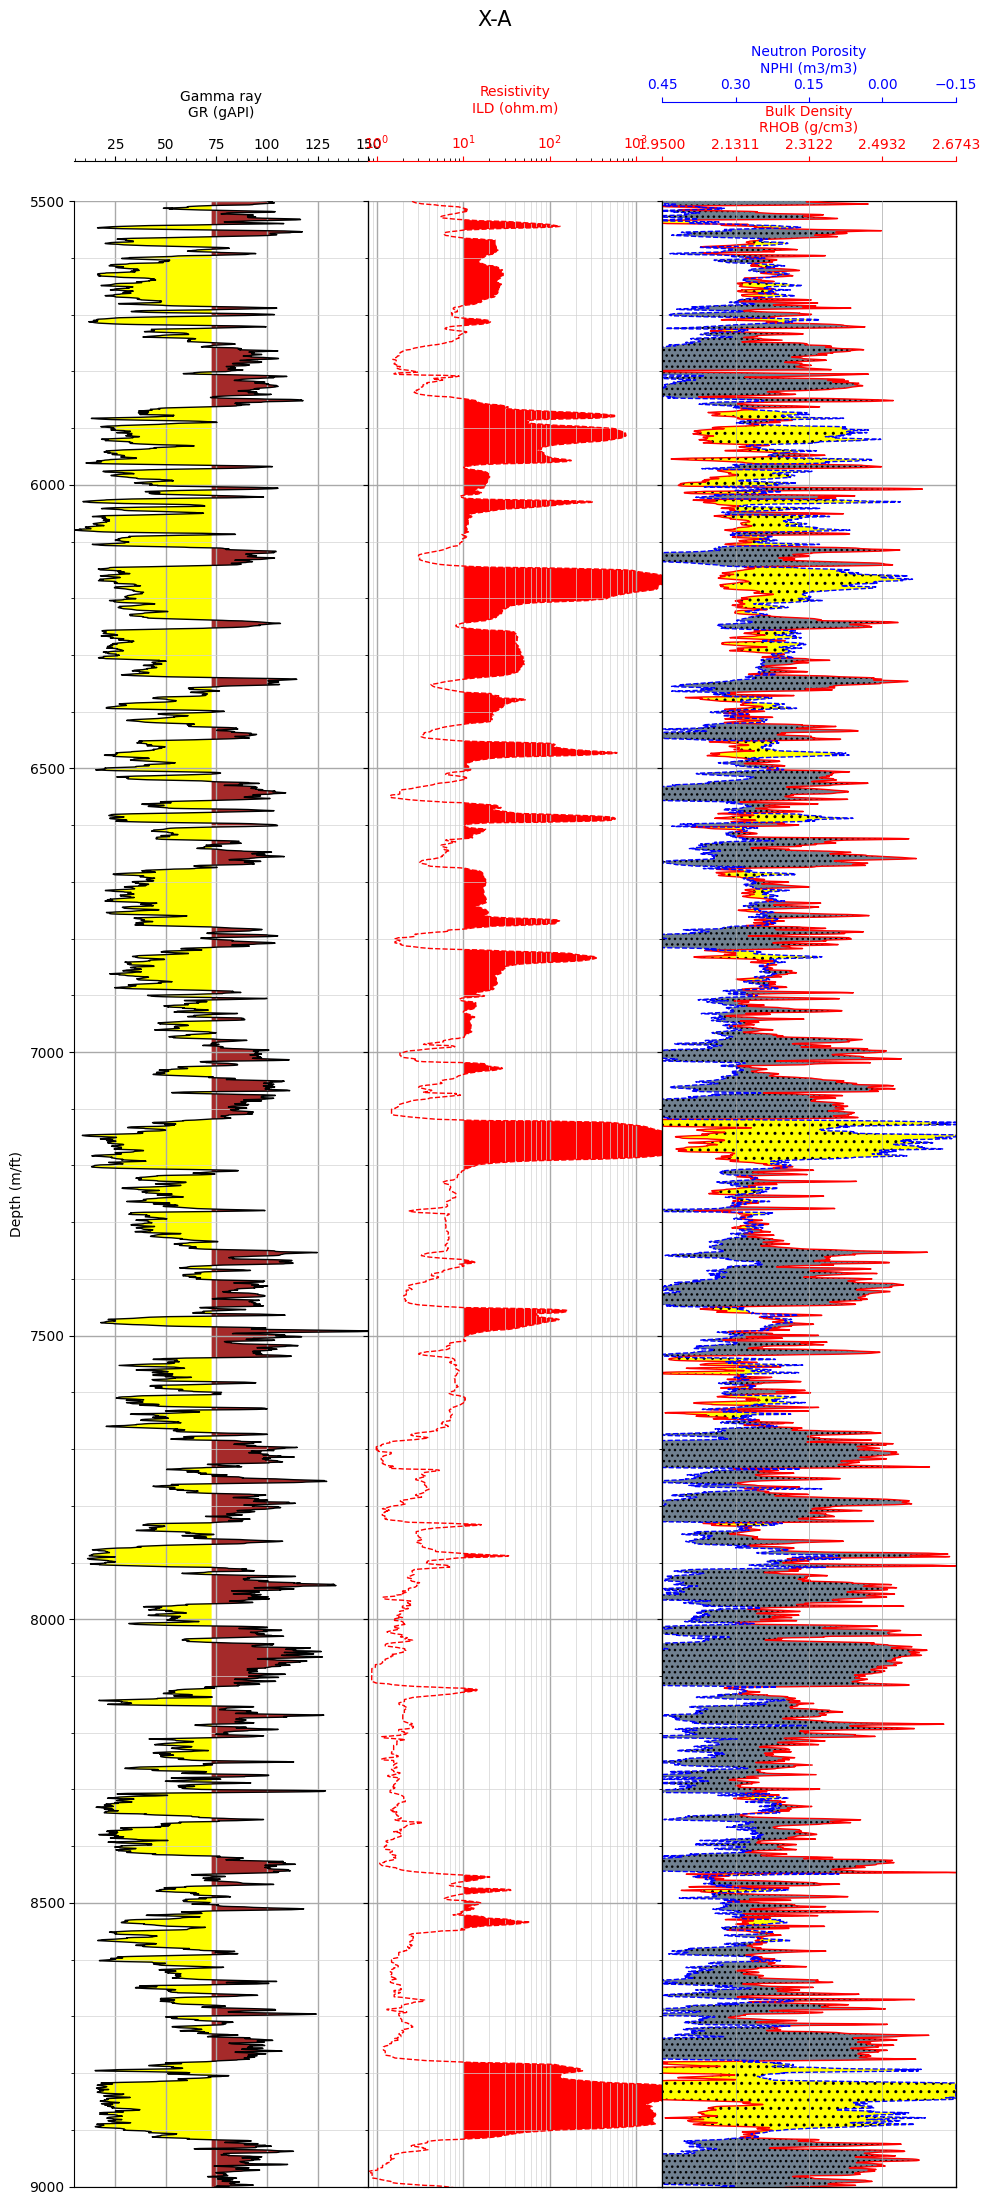

In [17]:
from petrolib.plots import tripleCombo

tripleCombo(well_df, depth='DEPTH', gr='GR', res='RT',
            nphi='NPHI', rhob='RHOB', ztop=5500, zbot=9000,
            figsize=(10, 22), fill='both', title='X-A')

Lets's tweak things

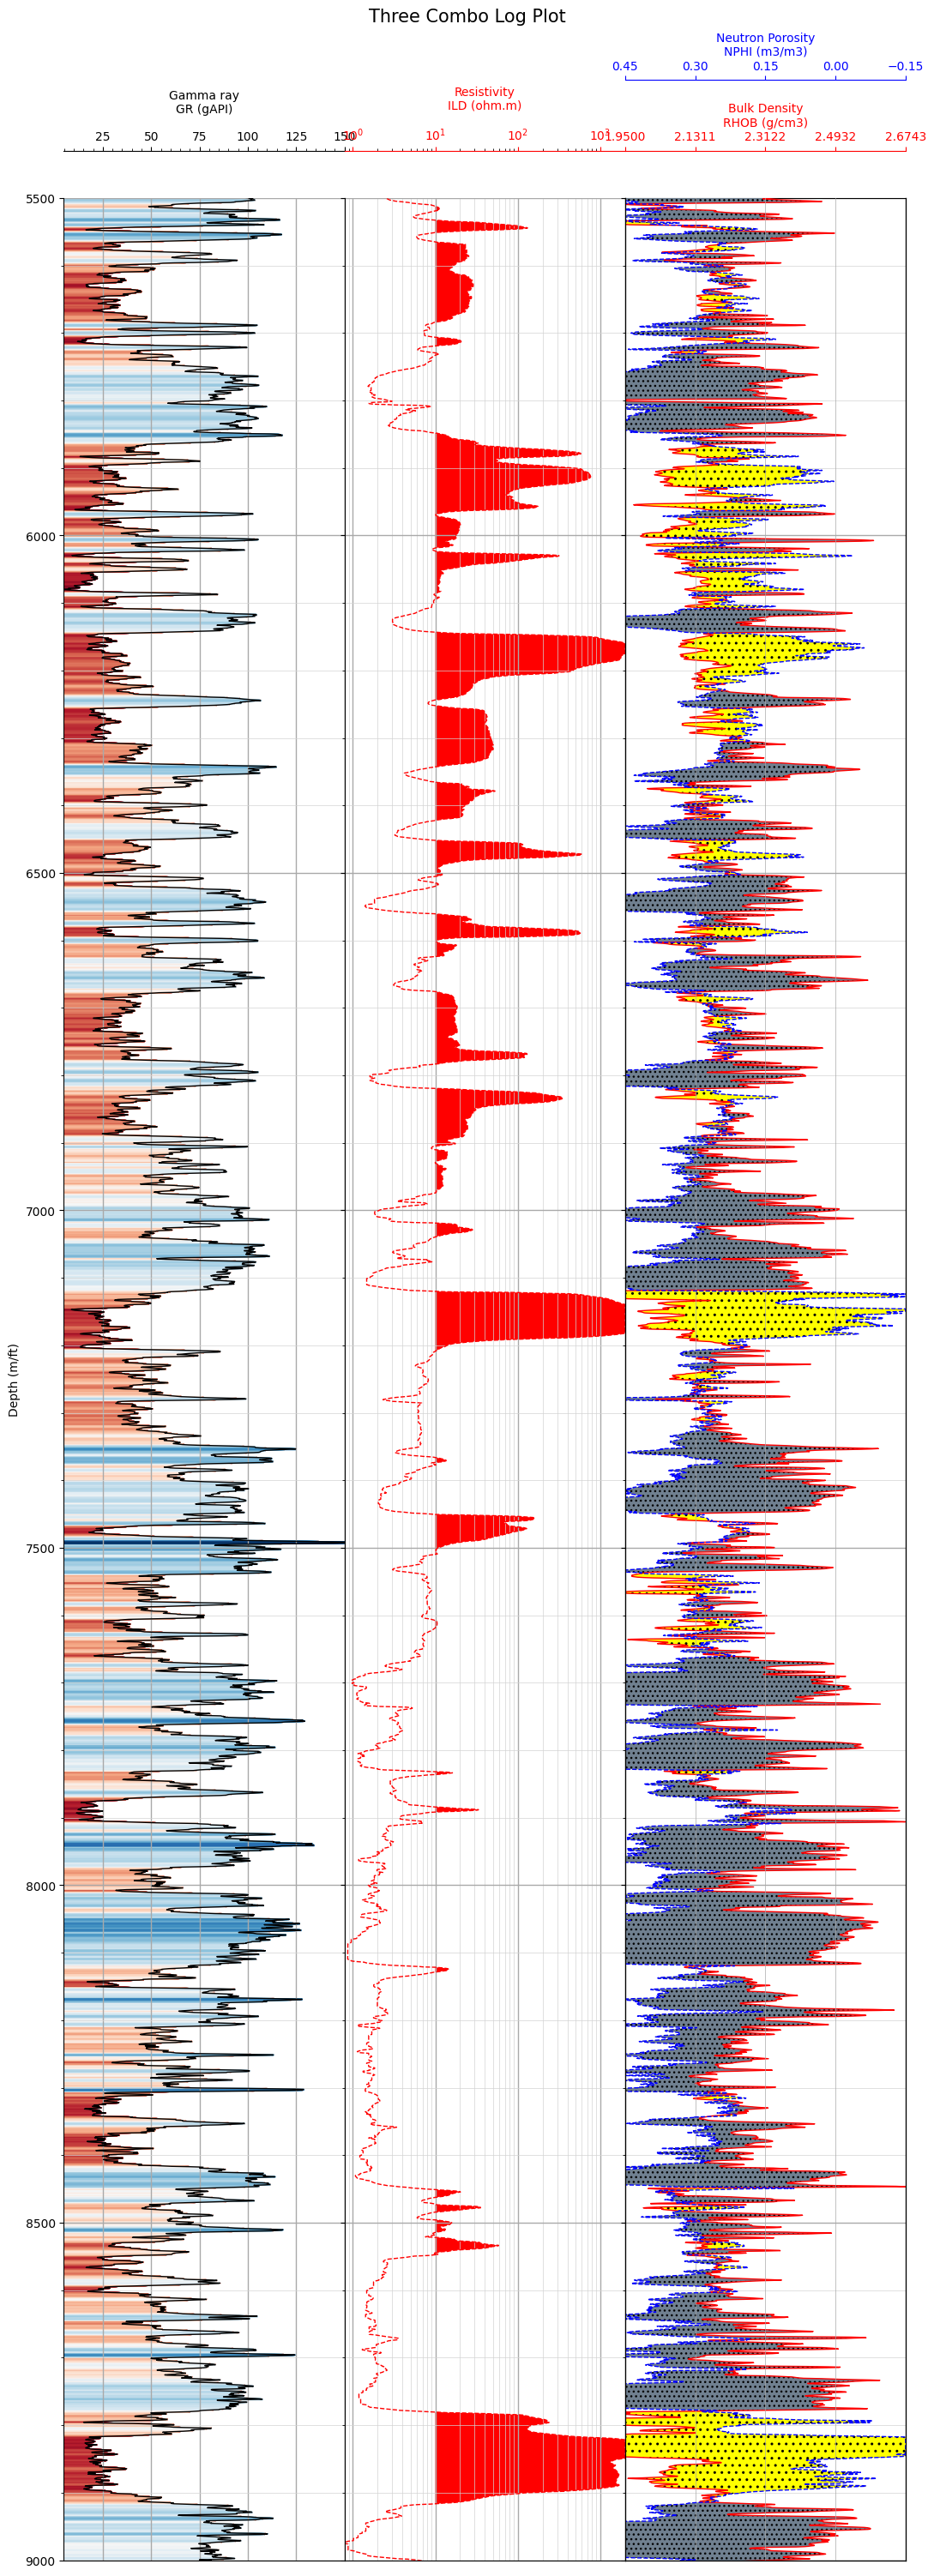

In [18]:
tripleCombo(well_df, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', ztop=5500, zbot=9000,
            res_thres=10, fill='both', limit='left', palette_op='RdBu', figsize=(11, 30))